In [213]:
%run Libraries.ipynb

In [214]:
%run Utility_tools.ipynb 

In [313]:
raw = pd.read_csv('car_data.txt')
df = deepcopy(raw)
df.sample(4)

,vhigh,vhigh.1,2,2.1,small,low,unacc
734,high,med,5more,2,big,low,unacc
393,vhigh,low,4,4,big,med,acc
1629,low,low,2,4,small,med,acc
481,high,vhigh,3,more,med,high,unacc


In [128]:
def plot_countplot(data, target):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(9,7))
    ax = sns.countplot(data=data, x=target, order=['unacc', 'acc', 'good', 'vgood']   )
    for p in ax.patches:
        total = len(data) 
        ax.annotate('{:.1f}%'.format(p.get_height()/total*100), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show();

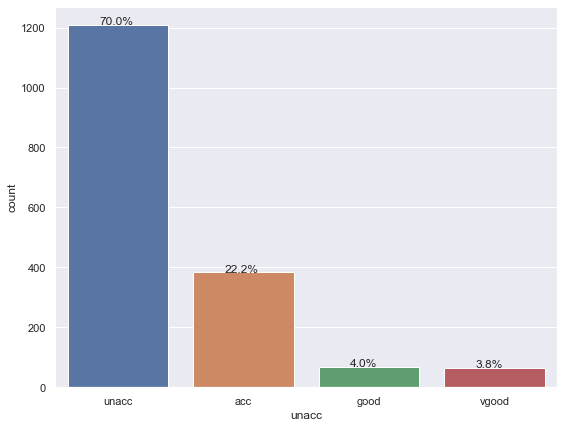

In [129]:
plot_countplot(df, 'unacc')

In [118]:
df.describe() #Very few unique values each

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [120]:
for col in df.columns:
    print(f'''{col}: {df[col].unique()}''')

vhigh: ['vhigh' 'high' 'med' 'low']
vhigh.1: ['vhigh' 'high' 'med' 'low']
2: ['2' '3' '4' '5more']
2.1: ['2' '4' 'more']
small: ['small' 'med' 'big']
low: ['med' 'high' 'low']
unacc: ['unacc' 'acc' 'vgood' 'good']


In [127]:
#This seems like such a uniform distribution
for col in df.columns:
    print(f'''{col}: {df[col].value_counts().to_frame()} \n''')

vhigh:        vhigh
high     432
med      432
low      432
vhigh    431 

vhigh.1:        vhigh.1
high       432
med        432
low        432
vhigh      431 

2:          2
3      432
4      432
5more  432
2      431 

2.1:       2.1
4     576
more  576
2     575 

small:        small
med      576
big      576
small    575 

low:       low
med   576
high  576
low   575 

unacc:        unacc
unacc   1209
acc      384
good      69
vgood     65 



In [131]:
def plot_countplot(data):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(9,7))
    for column in df.columns[:-1]:
        ax = sns.countplot(data=data, x=column)
        for p in ax.patches:
            total = len(data) 
            ax.annotate('{:.1f}%'.format(p.get_height()/total*100), (p.get_x()+0.25, p.get_height()+0.01))
        plt.show();

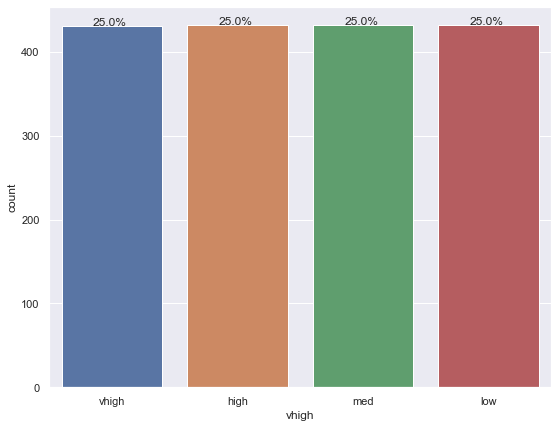

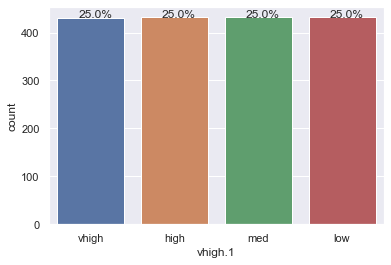

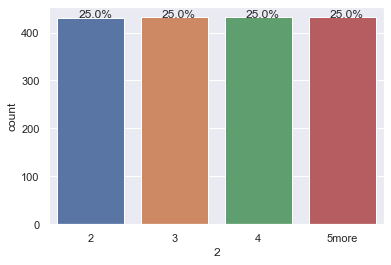

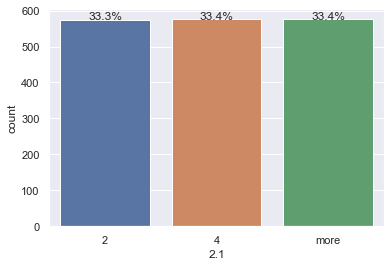

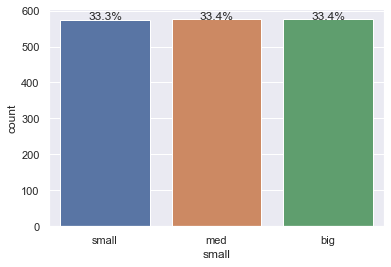

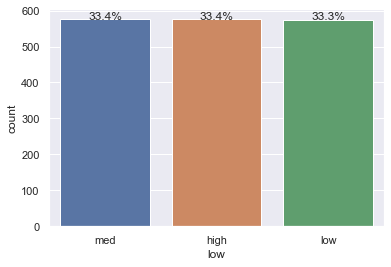

In [132]:
plot_countplot(df) #The samples have equal size. The features are ordinal.

In [215]:
df.duplicated().sum()

0

##### Chi-Square test between the features and the target

In [314]:
for column in df.columns[:-1]:
    csq = chi2_contingency(pd.crosstab(df[column], df['unacc']), correction=True)
    print(f'''P-value for {column}: , {csq[1]}''')

P-value for vhigh: , 7.029416116370655e-36
P-value for vhigh.1: , 2.9808687284632554e-26
P-value for 2: , 0.3312602352450521
P-value for 2.1: , 5.30659778660845e-77
P-value for small: , 1.129629723303536e-09
P-value for low: , 3.2287730970407905e-100


In [315]:
df = pd.concat([pd.get_dummies(df.iloc[:,:-1]), df['unacc']], axis=1)

In [316]:
l = LabelEncoder()
df['unac'] = pd.Series(l.fit_transform(df.iloc[:,-1])).to_frame()
df.drop('unacc', axis=1, inplace=True)

In [317]:
df.tail()

,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,2_3,...,2.1_2,2.1_4,2.1_more,small_big,small_med,small_small,low_high,low_low,low_med,unac
1722,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
1723,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,3
1724,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,2
1725,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
1726,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,3


#### Random Forest Classifier (without tuning)

In [319]:
x = df.iloc[:,:-1] #Pre-modeling
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [320]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=12)
rfc = rfc.fit(x_train, y_train)
forest_preds = rfc.predict(x_test)
forest_probs = rfc.predict_proba(x_test)[:,1]

In [321]:
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        77
           1       0.90      0.60      0.72        15
           2       1.00      0.99      0.99       237
           3       0.68      0.76      0.72        17

    accuracy                           0.96       346
   macro avg       0.87      0.83      0.84       346
weighted avg       0.96      0.96      0.96       346



In [323]:
def plot_rf_feat_importance(rf_model, X):
    rf_features_importance=pd.DataFrame({
    "Features":list(rf_model.feature_importances_)
    },index=X.columns).sort_values(by="Features", axis=0, ascending=True)
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes([0,0,1,1])
    ax.barh(rf_features_importance.index[-10:],rf_features_importance.Features[-10:],color="purple")
    for i, v in enumerate(rf_features_importance.Features[-10:]):
        ax.text(v+0.001, i,('% 0.2f' % v)+"%")
    plt.show();

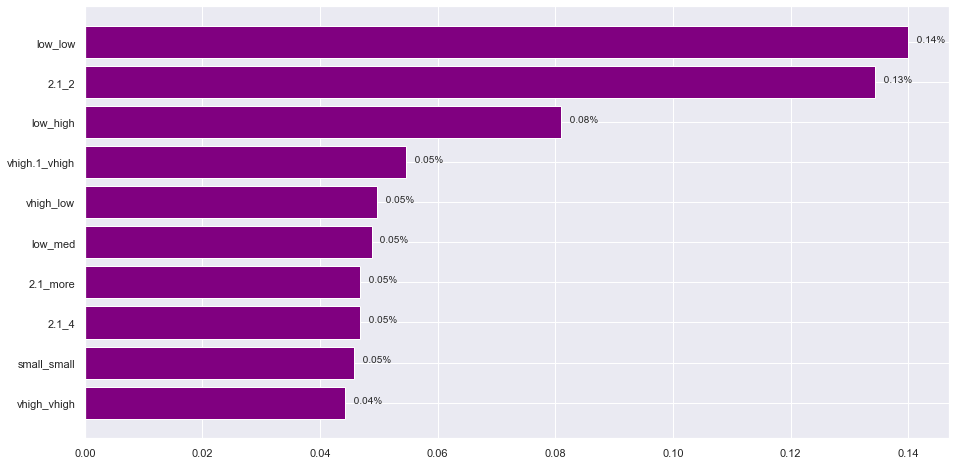

In [306]:
plot_rf_feat_importance(rf_model=rfc, X=x) #The most important encoded features

In [307]:
def plot_summary(model, X_train):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values[1], X_train.astype("float"))

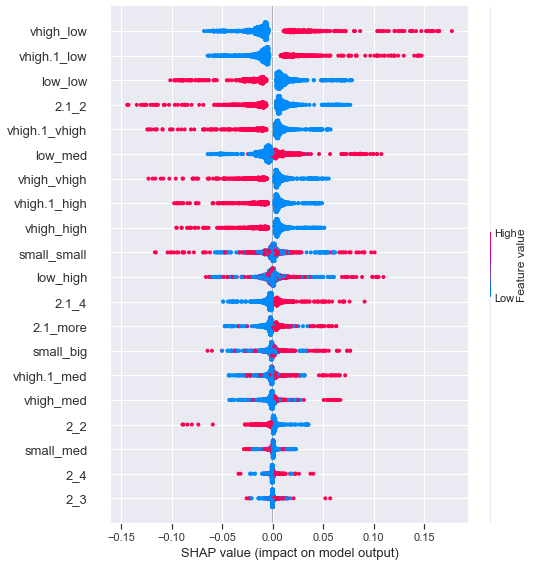

In [311]:
plot_summary(rfc, x_train)

#### Random Forest with Cross-Validation and Tuning

In [324]:
rfc_ = RandomForestClassifier(random_state=42)

In [325]:
param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,10,12],
    'criterion' :['gini', 'entropy']
}

In [326]:
CV_rfc = GridSearchCV(estimator=rfc_, param_grid=param_grid, cv=5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 500]})

In [327]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 500}

In [328]:
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 500, 
                            max_depth=12, criterion='gini')
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=500)

In [329]:
rf_pred = rfc1.predict(x_test)

##### Our recall and f1-score results have improved (especially for the smaller samples)

In [330]:
print(classification_report(y_test, rf_pred)) 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        77
           1       0.90      0.60      0.72        15
           2       1.00      0.99      0.99       237
           3       0.74      0.82      0.78        17

    accuracy                           0.96       346
   macro avg       0.89      0.84      0.86       346
weighted avg       0.96      0.96      0.96       346



In [332]:
rfc.score(x_train, y_train) #We have slight overfitting

1.0